Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats
import io

Mounted at /content/drive


Loading dfs

In [2]:
X_train = pd.read_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/X_train.pkl')
y_train = pd.read_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/y_train.pkl')
cat_col = pd.read_csv('/content/drive/MyDrive/Lab_datos/Patient_Survival/cat_col.csv')
num_col = pd.read_csv('/content/drive/MyDrive/Lab_datos/Patient_Survival/num_col.csv')

Cleaning data

In [3]:
cat_cols = cat_col['0'].tolist()
num_cols = num_col['0'].tolist()
num_cols.remove("hospital_death")

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X_train[cat_cols] = X_train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ])

X_train_transformed = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_transformed.shape

(73370, 118)

In [5]:
cat_encoder = OneHotEncoder()
patient_cat_1hot = cat_encoder.fit_transform(X_train[cat_cols])

In [6]:
cols = num_cols
for i in range(len(cat_encoder.categories_)):
  cols = np.concatenate([cols,cat_encoder.categories_[i]],axis = None)

In [7]:
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = cols)
X_train_transformed_df = X_train_transformed_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
X_train_transformed_df

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,Cardiovascular,Gastrointestinal,Haematologic,Metabolic,Neurologic,Renal/Genitourinary,Respiratory,Trauma,Undefined Diagnoses,Undefined diagnoses
0,-0.638313,0.704749,-0.474964,-1.143576,-0.586385,-0.315841,0.096822,1.367602,-0.970624,-0.502065,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.528108,0.210416,-0.474964,-0.154459,0.404820,-0.253305,0.125209,-0.752860,-0.324702,-0.502065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.068599,-0.136676,-0.474964,1.235903,-1.782818,-0.330507,0.396916,-0.741209,-0.320343,-0.502065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.434365,-0.803274,2.105422,1.898425,-0.586385,0.938758,-0.093779,1.367602,1.412401,1.991774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.638313,0.448065,-0.474964,-0.191785,1.265030,-0.315565,0.327976,-0.822765,-0.986129,-0.502065,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73365,0.032259,-1.711436,-0.474964,0.284111,-0.354958,0.094242,-1.559783,1.379253,-0.749577,-0.502065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73366,-1.247924,0.491084,-0.474964,-0.191785,0.824009,-0.293151,0.367718,-0.706256,-0.545879,-0.502065,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73367,-0.577352,1.185535,-0.474964,-0.191785,-1.079805,-0.317225,1.009272,-0.881019,-0.973118,-0.502065,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73368,-0.028702,0.123227,2.105422,-0.191785,0.513984,-0.217610,0.027881,0.330673,1.839597,1.991774,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_transformed

array([[-0.63831298,  0.70474899, -0.47496412, ...,  0.        ,
         0.        ,  0.        ],
       [-2.52810804,  0.21041559, -0.47496412, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06859869, -0.13667619, -0.47496412, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57735185,  1.18553455, -0.47496412, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02870167,  0.12322703,  2.10542221, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0896628 ,  0.20056205, -0.47496412, ...,  0.        ,
         0.        ,  0.        ]])

Mutual information

In [ ]:
X_train_2 = X_train.copy()
X_train_2[cat_cols] = X_train_2[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
for colname in X_train_2.select_dtypes("object"):
    X_train_2[colname], _ = X_train_2[colname].factorize()

for col in num_cols:     #---Applying Only on variables with NaN values
    X_train_2.loc[X_train_2[col].isna(),col] = X_train_2[col].mean()
discrete_features = X_train_2.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(X_train_2,y_train)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train_2.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [ ]:
mi_scores[-10:-1]
# we can see that these features are irrelevant

d1_diasbp_max        0.000734
cirrhosis            0.000500
arf_apache           0.000415
icu_stay_type        0.000276
immunosuppression    0.000200
hepatic_failure      0.000169
patient_id           0.000098
height               0.000000
diabetes_mellitus    0.000000
Name: MI Scores, dtype: float64

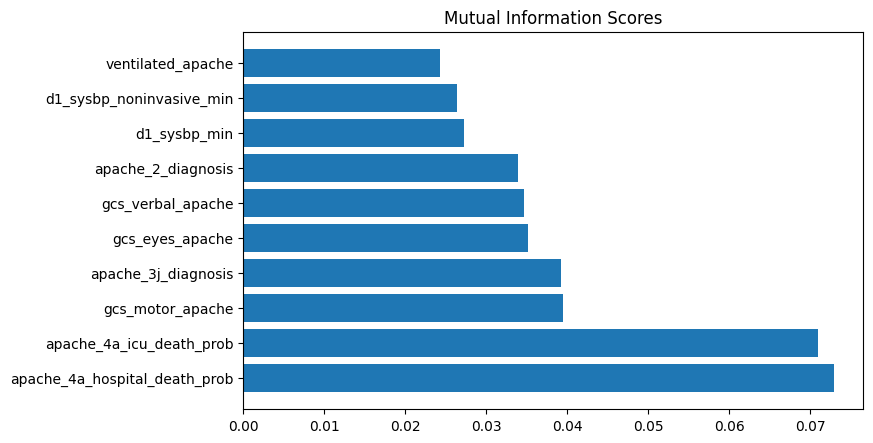

In [ ]:
def plot_mi_scores(scores):
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[0:10])

PCA

Text(0.5, 0, 'PC')

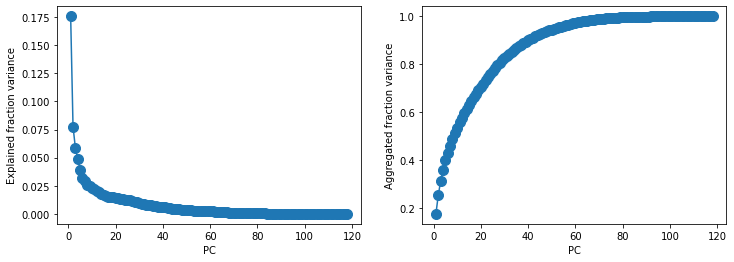

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit_transform(X_train_transformed_df)
explained_variance_s=pca.explained_variance_ratio_
# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(explained_variance_s) + 1), explained_variance_s, '.-', markersize = 20)
ax[0].set_ylabel('Explained fraction variance')
ax[0].set_xlabel('PC')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(explained_variance_s)

ax[1].plot(range(1, len(explained_variance_s) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Aggregated fraction variance')
ax[1].set_xlabel('PC')


We can see that with 60 components we are explaining most of the DS

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
pca.fit(X_train_transformed_df)
X_pca = pca.transform(X_train_transformed_df)

# Models

In [9]:
# Import necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [10]:
# Initialize the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
#clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
#clf5 = KNeighborsClassifier()

In [11]:
# Initiaze the hyperparameters for each dictionary
params = {}
params["param1"] = {}
params["param1"]["params"] = {}
params["param1"]["params"]['classifier__n_estimators'] = [10, 50, 100, 250]
params["param1"]["params"]['classifier__max_depth'] = [5, 10, 20]
params["param1"]["params"]['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
params["param1"]['classifier'] = clf1

params["param2"] = {}
params["param2"]["params"] = {}
params["param2"]["params"]['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
params["param2"]["params"]['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
params["param2"]['classifier'] = clf2

#params["param3"] = {}
#params["param3"]["params"] = {}
#params["param3"]["params"]['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
#params["param3"]["params"]['classifier__penalty'] = ['l1', 'l2']
#params["param3"]["params"]['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
#params["param3"]['classifier'] = clf3

params["param4"] = {}
params["param4"]["params"] = {}
params["param4"]["params"]['classifier__max_depth'] = [5,10,25,None]
params["param4"]["params"]['classifier__min_samples_split'] = [2,5,10]
params["param4"]["params"]['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
params["param4"]['classifier'] = clf4

#params["param5"] = {}
#params["param5"]["params"] = {}
#params["param5"]["params"]['classifier__n_neighbors'] = [2,5,10,25,50]
#params["param5"]['classifier'] = clf5

In [12]:
params["param1"]['params']

{'classifier__class_weight': [None,
  {0: 1, 1: 5},
  {0: 1, 1: 10},
  {0: 1, 1: 25}],
 'classifier__max_depth': [5, 10, 20],
 'classifier__n_estimators': [10, 50, 100, 250]}

In [12]:
# Train the grid search model
cv_results = pd.DataFrame()

for key in params.keys():
  over = SMOTE(sampling_strategy=0.1)
  under = RandomUnderSampler(sampling_strategy=0.5)
  steps = [('over', over), ('under', under), ('classifier',params[key]['classifier'])]
  pipeline = Pipeline(steps=steps)
  rs = RandomizedSearchCV(pipeline, params[key]['params'], cv=5, n_jobs=-1, scoring=['roc_auc','accuracy','f1','precision','recall'],refit="roc_auc")
  rs.fit(X_pca, y_train)
  aux = pd.DataFrame(rs.cv_results_)
  cv_results = pd.concat([cv_results,aux])
  print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.556875      2.794269         0.409861        0.119064   
1       9.724302      0.154271         0.314526        0.009454   
2       9.798051      0.180317         0.337616        0.006561   
3       9.534904      0.506828         0.345086        0.002357   
4      30.647560      1.162614         1.164202        0.239299   
5       4.180030      0.277852         0.167842        0.006017   
6      17.072834      0.140988         0.734319        0.010804   
7      42.186739      0.107281         1.540362        0.009765   
8       6.522526      0.073303         0.226876        0.006180   
9       3.925706      0.360787         0.167624        0.016944   

  param_classifier__n_estimators param_classifier__max_depth  \
0                            100                           5   
1                             50                          20   
2                             50                          20   
3     

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.556875      2.794269         0.409861        0.119064   
1       9.724302      0.154271         0.314526        0.009454   
2       9.798051      0.180317         0.337616        0.006561   
3       9.534904      0.506828         0.345086        0.002357   
4      30.647560      1.162614         1.164202        0.239299   
5       4.180030      0.277852         0.167842        0.006017   
6      17.072834      0.140988         0.734319        0.010804   
7      42.186739      0.107281         1.540362        0.009765   
8       6.522526      0.073303         0.226876        0.006180   
9       3.925706      0.360787         0.167624        0.016944   
0     341.380369      9.174063        45.804709        0.937536   
1     142.167731      1.526752        48.147009        1.017727   
2     174.623852      3.338952        61.577077        1.412944   
3     113.562085      3.114741        36.930963        1.10236

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.556875      2.794269         0.409861        0.119064   
1       9.724302      0.154271         0.314526        0.009454   
2       9.798051      0.180317         0.337616        0.006561   
3       9.534904      0.506828         0.345086        0.002357   
4      30.647560      1.162614         1.164202        0.239299   
5       4.180030      0.277852         0.167842        0.006017   
6      17.072834      0.140988         0.734319        0.010804   
7      42.186739      0.107281         1.540362        0.009765   
8       6.522526      0.073303         0.226876        0.006180   
9       3.925706      0.360787         0.167624        0.016944   
0     341.380369      9.174063        45.804709        0.937536   
1     142.167731      1.526752        48.147009        1.017727   
2     174.623852      3.338952        61.577077        1.412944   
3     113.562085      3.114741        36.930963        1.10236

In [13]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'classifier__class_weight': {0: 1, 1: 5},
 'classifier__max_depth': 5,
 'classifier__min_samples_split': 10}

In [14]:
rs.best_score_

0.810682761934993

In [15]:
rs.best_estimator_

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=5,
                                        min_samples_split=10,
                                        random_state=42))])

Test

In [16]:
X_test = pd.read_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/X_test.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/y_test.pkl')

In [28]:
X_test = X_test[X_train.columns]

In [30]:
X_test

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
47579,92589,96072,99,65.0,27.392860,0,Caucasian,M,172.70,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
19702,23100,82556,161,88.0,21.484375,0,Other/Unknown,F,160.00,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
78098,29610,127448,181,78.0,30.119587,0,Caucasian,F,165.10,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
67361,97681,3668,19,79.0,NaN,0,Caucasian,M,152.00,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
73148,65423,89004,92,83.0,28.966523,0,Caucasian,M,182.90,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72344,22960,6146,157,67.0,34.391439,0,Caucasian,M,180.30,Accident & Emergency,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined Diagnoses
88072,105403,116419,146,84.0,25.294251,1,Caucasian,M,188.00,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
12730,42473,16119,169,89.0,21.731676,0,African American,M,177.80,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary
90571,112818,36166,6,69.0,34.611787,0,Caucasian,F,170.18,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

final_model = rs.best_estimator_
X_test_transformed = full_pipeline.transform(X_test)
X_pca_test = pca.transform(X_test_transformed)
y_test_predictions = final_model.predict(X_pca_test)
confusion_matrix(y_test, y_test_predictions)
precision_score(y_test, y_test_predictions)
recall_score(y_test, y_test_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


0.8515476942514214

Saving Model

In [35]:
import pickle
filename = 'finalized_model.sav'
with open(filename, 'wb') as f:
  pickle.dump(final_model, f)

AUC entrenamiento: 0.8271
AUC evaluacion: 0.8187


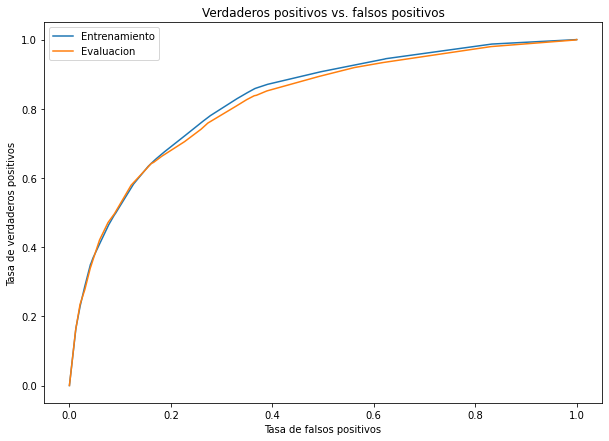

In [36]:
probas_train = final_model.predict_proba(X_pca)  # probabilidades con datos de entrenamiento
                                                # we should look por p(x) in order to understan threshold
probas_test = final_model.predict_proba(X_pca_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probas_train[:,1]) # para plotear curva ROC con datos de entrenamiento
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probas_test[:,1]) # para plotear curva ROC con datos de evaluacion
auc_train = roc_auc_score(y_train, probas_train[:,1]) #  AUC con datos de entrenamiento
auc_test = roc_auc_score(y_test, probas_test[:,1]) #  AUC con datos de evaluación

# para plotear ROC (codigo de un notebook anterior)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Verdaderos positivos vs. falsos positivos')
ax.plot(fpr_train,tpr_train, label = "Entrenamiento") # graficamos la curva ROC para el set de entrenamiento
ax.plot(fpr_test,tpr_test, label = "Evaluacion") # graficamos la curva ROC para el set de evaluacion

ax.set_xlabel('Tasa de falsos positivos') # Etiqueta del eje x
ax.set_ylabel('Tasa de verdaderos positivos') # Etiqueta del eje y

plt.legend()

print('AUC entrenamiento: {}'.format(round(auc_train,4)))  
print('AUC evaluacion: {}'.format(round(auc_test,4)))  


Test permutation

In [37]:
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True) # creamos un objeto de cross-validation

AUC, AUC_shuffled, pvalue = permutation_test_score(final_model, X_pca, y_train, scoring="roc_auc", cv=skf, n_permutations=100) # aca aplico la funcion 
# Notar que la función de arriba recibe como argumentos el clasificador (regLog) y la forma de hacer validación cruzada (skf), 
# además de los datos y el número de permutaciones que hacemos para construir nuestro modelo al azar.

print('Sin shufflear:')
print(AUC)
print('Modelo nulo (shuffleando):')
print(AUC_shuffled)
print('p-valor:')
print(pvalue)



Sin shufflear:
0.8101790024156037
Modelo nulo (shuffleando):
[0.49802988 0.50177967 0.49937362 0.49960956 0.4997338  0.50429131
 0.4993837  0.50029134 0.49948194 0.50507116 0.5050701  0.50018346
 0.50232317 0.49743361 0.50228041 0.4968217  0.49428644 0.49645124
 0.49280808 0.5010121  0.49861618 0.49968068 0.49963527 0.49954255
 0.50342177 0.4993055  0.49952282 0.50199358 0.50238338 0.50025282
 0.5064726  0.50097401 0.49991811 0.49630757 0.50876036 0.49693573
 0.49851647 0.50135349 0.49980151 0.49910709 0.50063529 0.5007884
 0.50484306 0.49654495 0.50173378 0.50044372 0.498195   0.50192468
 0.49612355 0.49965811 0.5025087  0.50064601 0.50363308 0.49437426
 0.49928328 0.5002627  0.49960465 0.49872569 0.49857804 0.49777052
 0.5013394  0.50103482 0.49774584 0.49568443 0.49951903 0.50122246
 0.49429998 0.49733584 0.50319672 0.49799631 0.49888257 0.49912405
 0.50124086 0.50021282 0.49886853 0.49976659 0.4985925  0.49725405
 0.50035701 0.49737815 0.49718936 0.50127317 0.50053883 0.5007081
 0.

Text(0, 0.5, 'Probabilidad')

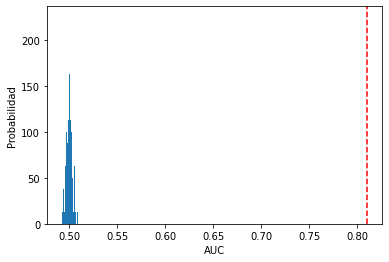

In [38]:
fig, ax = plt.subplots()

ax.hist(AUC_shuffled, bins=20, density=True) # armo el histograma de valores, normalizado para tener la probabilidad
ax.axvline(AUC, ls='--', color='r') # una linea vertical para indicar el AUC sin shufflear (modelo real)
ax.set_xlabel("AUC") # nombre de eje x
ax.set_ylabel("Probabilidad") # nombre de eje y

The model is significantly better than a random one

Machine learning explainability

In [42]:
feature_importances = rs.best_estimator_._final_estimator.feature_importances_
feature_importances

array([0.14146548, 0.6244963 , 0.        , 0.        , 0.13577764,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05032955, 0.        ,
       0.01037452, 0.02405501, 0.        , 0.00917059, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00065446, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00274927, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00092718, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [43]:
attributes = cols
k = 5
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])
top_k_feature_indices = indices_of_top_k(feature_importances, k)
np.array(attributes)[top_k_feature_indices]
sorted(zip(feature_importances, attributes), reverse=True)[:k]

#We can see that the most important features were bmi, age, icu_id, resprate in apache and d1 diasbp max.

[(0.6244963039300198, 'bmi'),
 (0.14146547924249617, 'age'),
 (0.1357776362732967, 'icu_id'),
 (0.05032955378014963, 'resprate_apache'),
 (0.024055009329529833, 'd1_diasbp_max')]